In [1]:
import pandas as pd

file_path = "/content/GlobalWeatherRepository.csv"

df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58270 entries, 0 to 58269
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       58270 non-null  object 
 1   location_name                 58270 non-null  object 
 2   latitude                      58270 non-null  float64
 3   longitude                     58270 non-null  float64
 4   timezone                      58270 non-null  object 
 5   last_updated_epoch            58270 non-null  int64  
 6   last_updated                  58270 non-null  object 
 7   temperature_celsius           58270 non-null  float64
 8   temperature_fahrenheit        58270 non-null  float64
 9   condition_text                58270 non-null  object 
 10  wind_mph                      58270 non-null  float64
 11  wind_kph                      58270 non-null  float64
 12  wind_degree                   58270 non-null  int64  
 13  w

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df['last_updated'] = pd.to_datetime(df['last_updated'])

df = df.dropna()

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

scaler = MinMaxScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

df.set_index('last_updated', inplace=True)

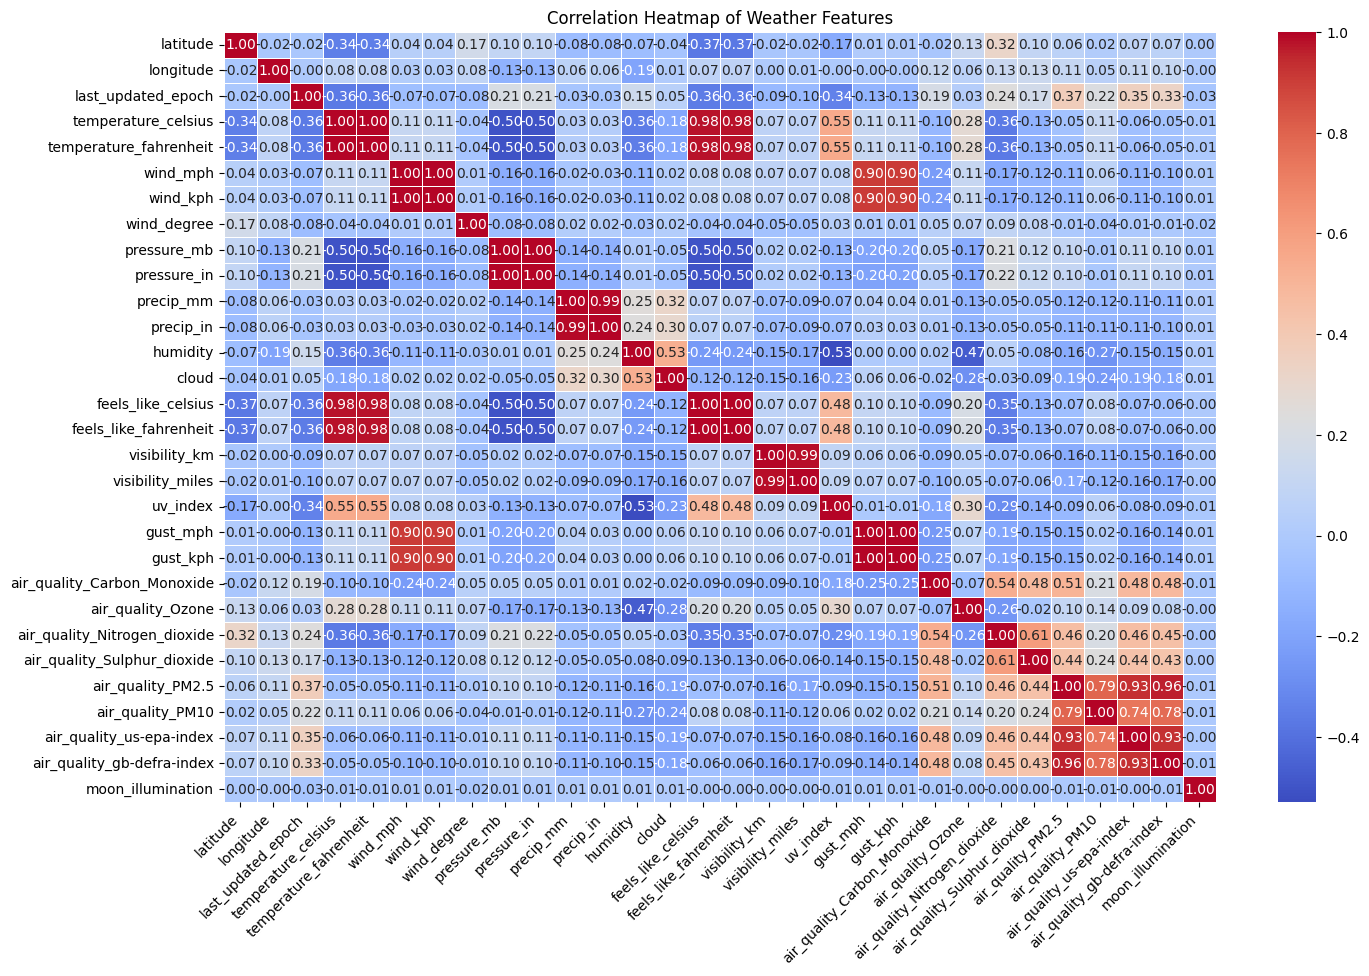

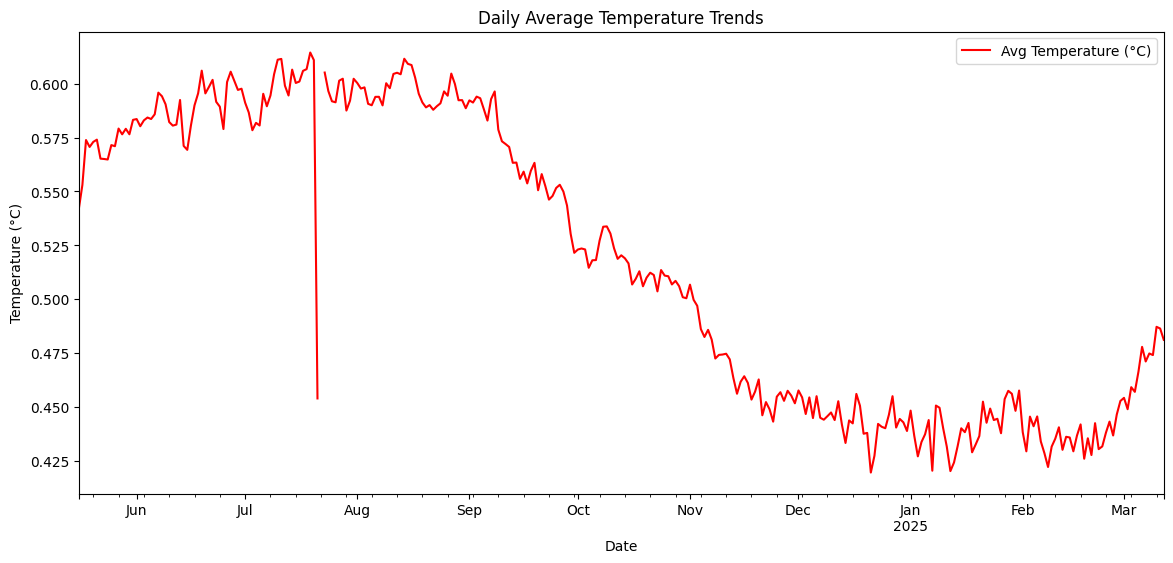

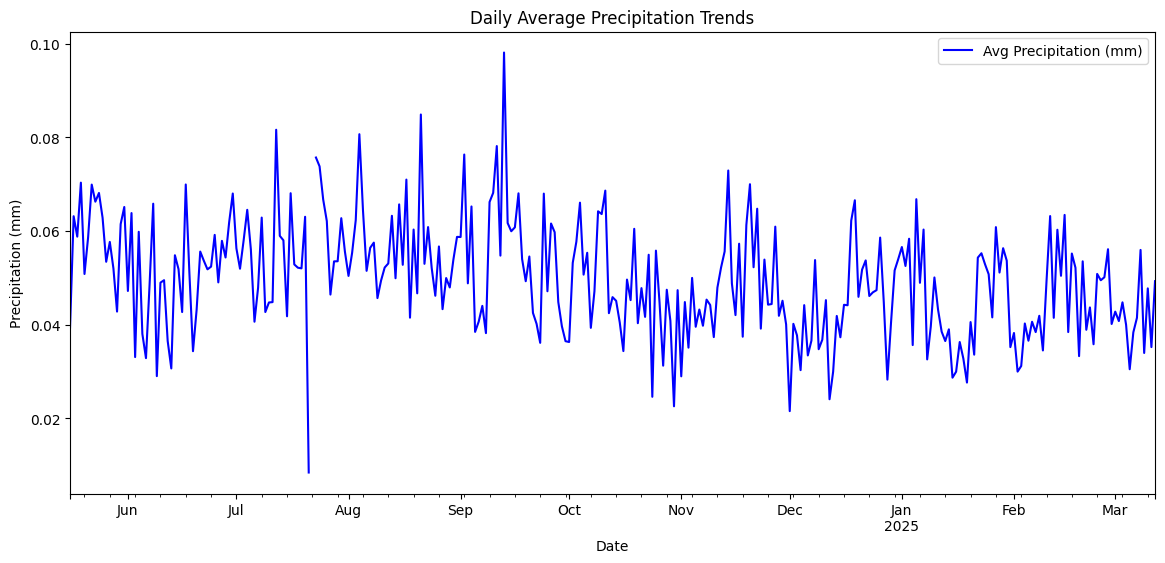

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap of Weather Features')
plt.show()


plt.figure(figsize=(14, 6))
df.resample('D')['temperature_celsius'].mean().plot(label='Avg Temperature (°C)', color='r')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature Trends')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
df.resample('D')['precip_mm'].mean().plot(label='Avg Precipitation (mm)', color='b')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Daily Average Precipitation Trends')
plt.legend()
plt.show()

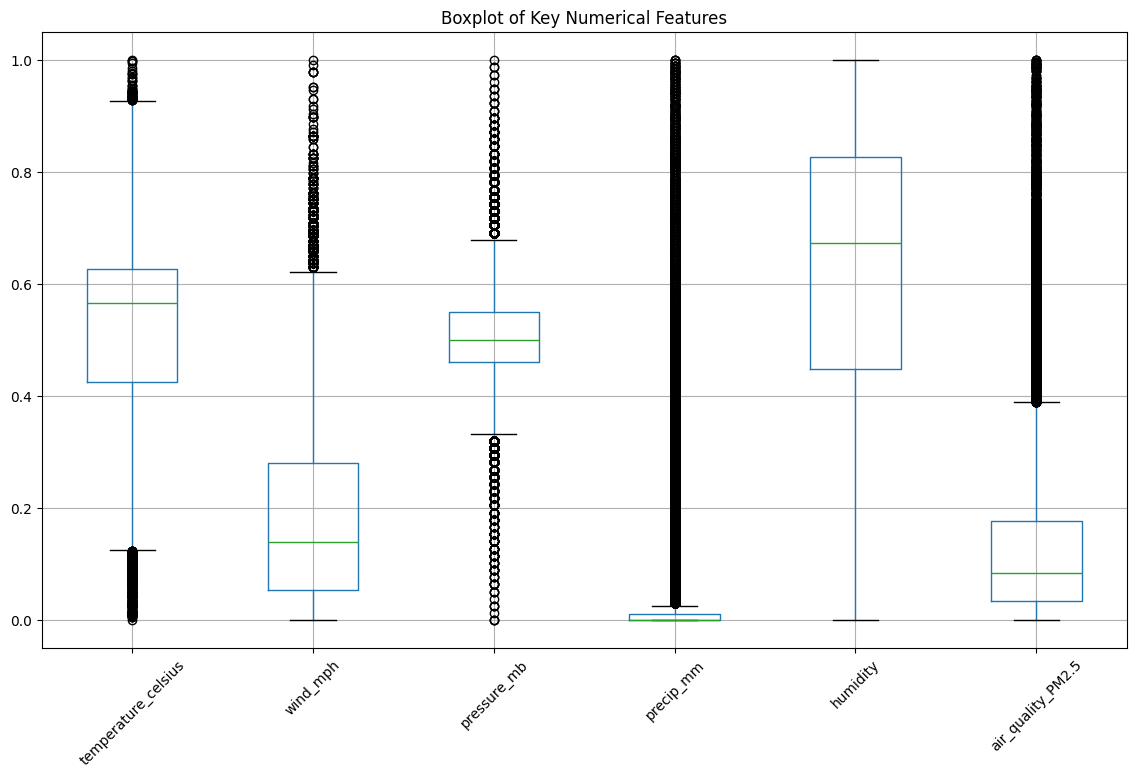

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

!pip install geopandas

plt.figure(figsize=(14, 8))
numerical_features = ['temperature_celsius', 'wind_mph', 'pressure_mb', 'precip_mm', 'humidity', 'air_quality_PM2.5']
df[numerical_features].boxplot(rot=45)
plt.title("Boxplot of Key Numerical Features")
plt.show()

# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# fig, ax = plt.subplots(figsize=(14, 8))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)

# sc = ax.scatter(gdf.longitude, gdf.latitude, c=df["temperature_celsius"], cmap="coolwarm", alpha=0.6)
# ax.set_title("Global Temperature Distribution")
# plt.colorbar(sc, cax=cax, label="Temperature (°C)")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=df["temperature_celsius"], y=df["air_quality_PM2.5"], alpha=0.5, color="purple")
# plt.xlabel("Temperature (°C)")
# plt.ylabel("PM2.5 Air Quality Index")
# plt.title("Temperature vs Air Quality (PM2.5)")
# plt.show()

# corr_temp_pm25 = df[["temperature_celsius", "air_quality_PM2.5"]].corr().iloc[0, 1]
# print(f"Correlation between Temperature and PM2.5: {corr_temp_pm25:.2f}")

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = df.sort_index()

numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

df_numeric = df_numeric.groupby(df.index).mean()

df_numeric = df_numeric.asfreq('D')

df_numeric.ffill(inplace=True)


train_size = int(len(df_numeric) * 0.8)
train, test = df_numeric.iloc[:train_size], df_numeric.iloc[train_size:]

try:
    model = ARIMA(train['temperature_celsius'], order=(2, 1, 2))
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=len(test))

    test = test.copy()
    test['forecast'] = forecast.ffill()

    mse = mean_squared_error(test['temperature_celsius'], test['forecast'])
    print(f'ARIMA Model - Mean Squared Error: {mse:.3f}')

except Exception as e:
    print(f"ARIMA Model Error: {e}")

ARIMA Model - Mean Squared Error: 0.021


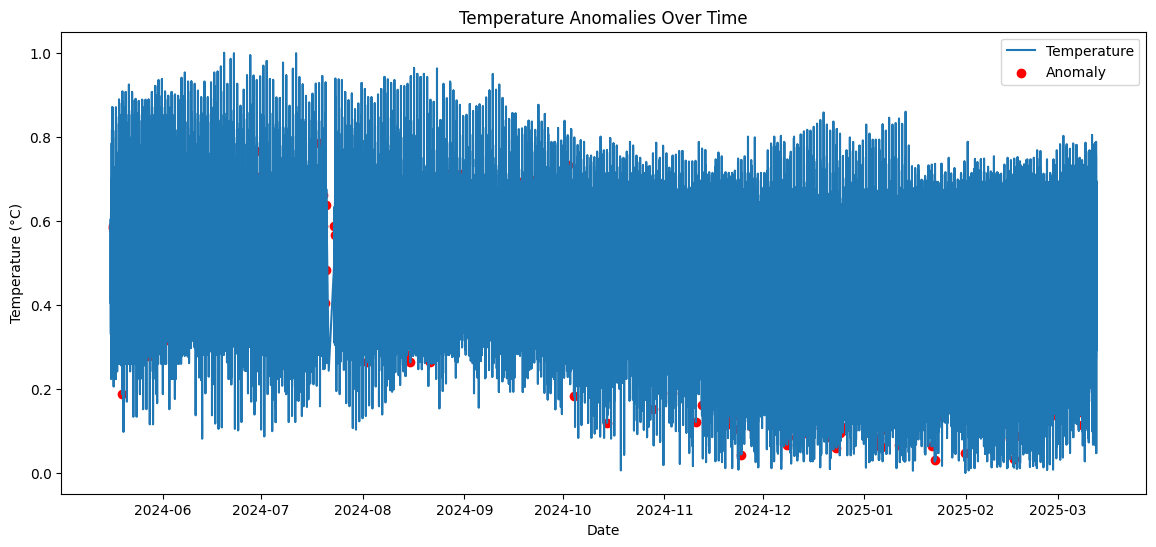

In [13]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(df[['temperature_celsius', 'precip_mm']])

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_celsius'], label='Temperature')
plt.scatter(df[df['anomaly'] == -1].index, df[df['anomaly'] == -1]['temperature_celsius'], color='r', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Anomalies Over Time')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train['temperature_celsius'], seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(len(test))

ensemble_forecast = (forecast + hw_forecast) / 2

ensemble_mse = mean_squared_error(test['temperature_celsius'], ensemble_forecast)
print(f'Ensemble Model - Mean Squared Error: {ensemble_mse}')

Ensemble Model - Mean Squared Error: 0.02090711857865057


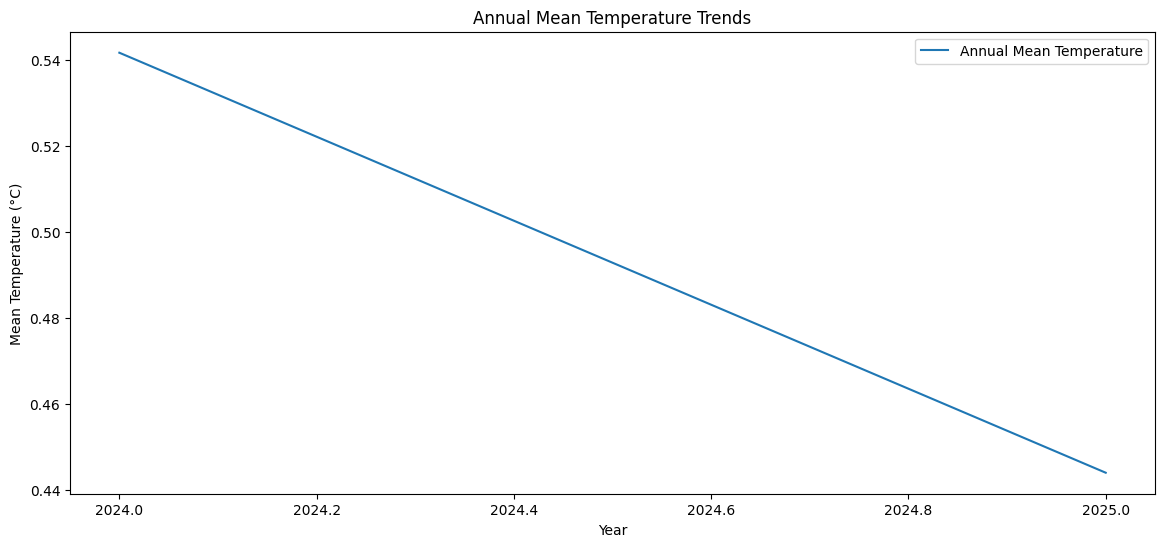

In [15]:
df['year'] = df.index.year
annual_temp = df.groupby('year')['temperature_celsius'].mean()

plt.figure(figsize=(14, 6))
plt.plot(annual_temp.index, annual_temp.values, label='Annual Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Annual Mean Temperature Trends')
plt.legend()
plt.show()

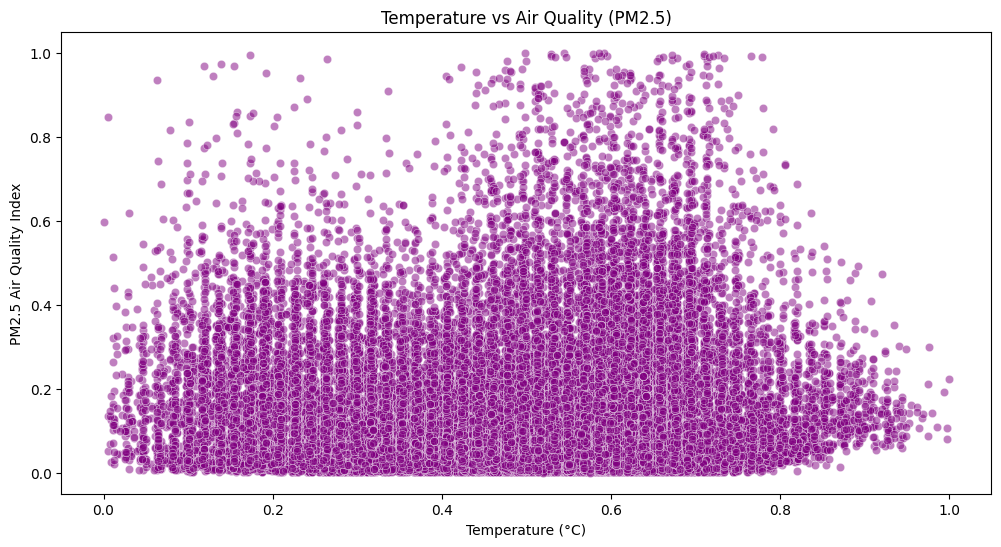

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["temperature_celsius"], y=df["air_quality_PM2.5"], alpha=0.5, color="purple")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 Air Quality Index")
plt.title("Temperature vs Air Quality (PM2.5)")
plt.show()

<ipython-input-18-2598a1ca3e5d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


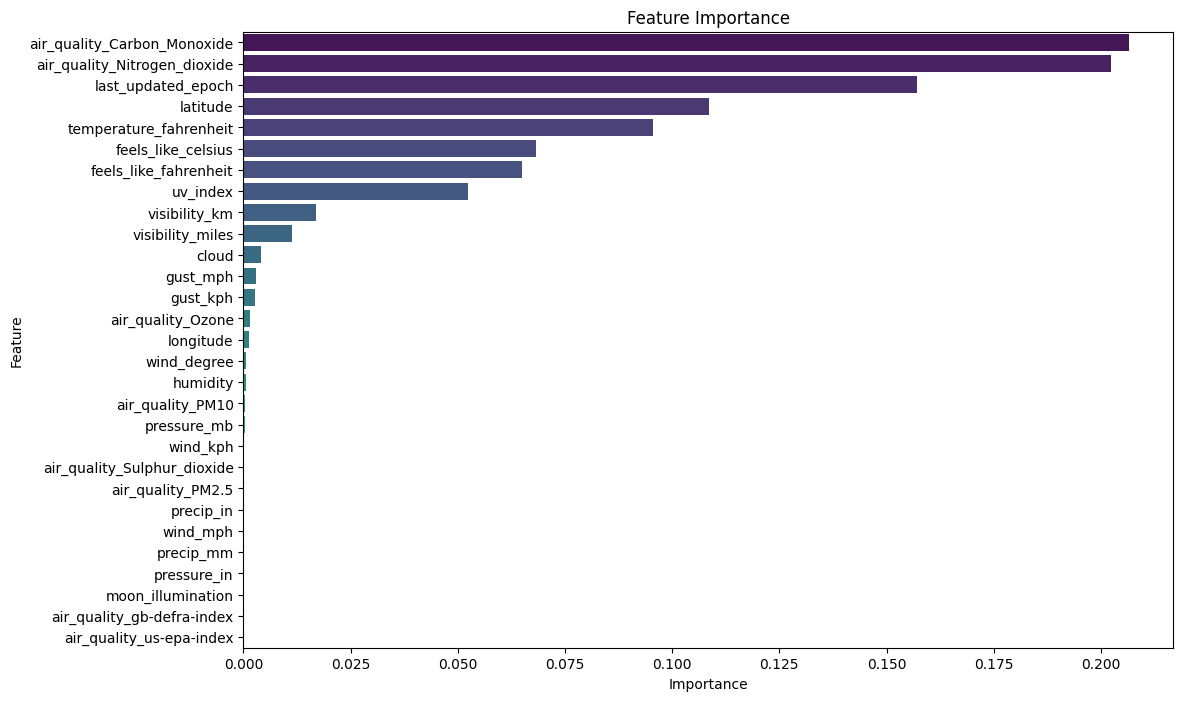

In [18]:
from sklearn.ensemble import RandomForestRegressor

X = df_numeric.drop(columns=['temperature_celsius', 'anomaly', 'year'], errors='ignore')

X = X.select_dtypes(include=[np.number])

y = df_numeric['temperature_celsius']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title('Feature Importance')
plt.show()

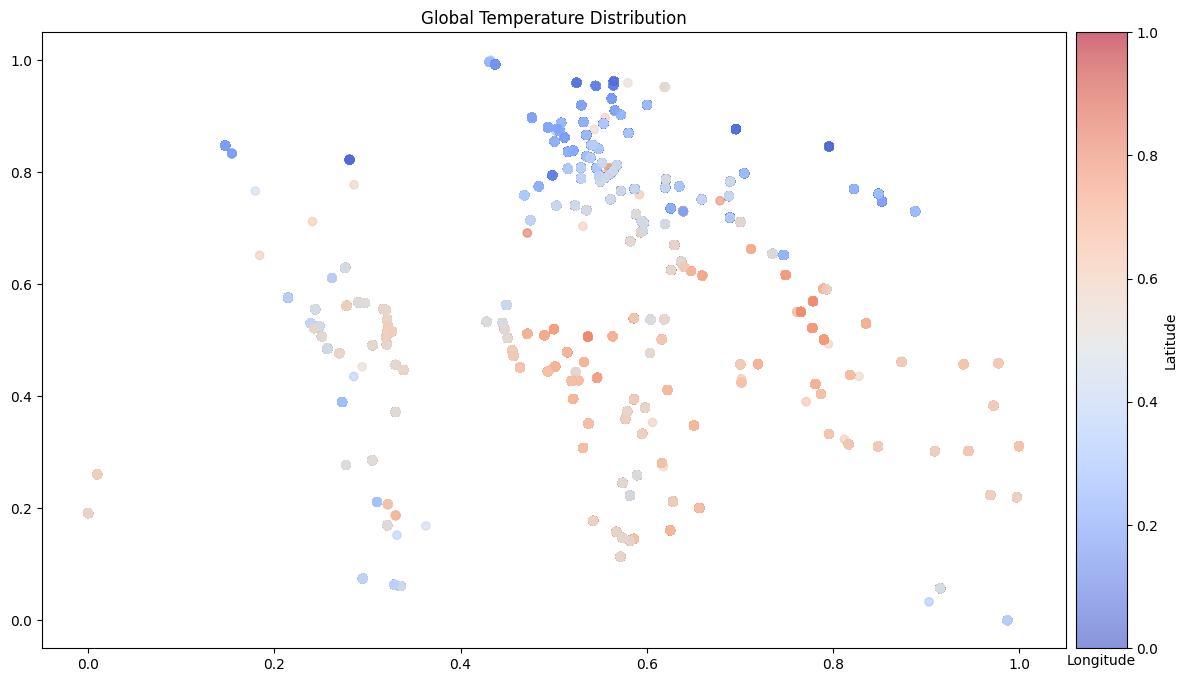

In [19]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

fig, ax = plt.subplots(figsize=(14, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sc = ax.scatter(gdf.longitude, gdf.latitude, c=df["temperature_celsius"], cmap="coolwarm", alpha=0.6)
ax.set_title("Global Temperature Distribution")
plt.colorbar(sc, cax=cax, label="Temperature (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [20]:
corr_temp_pm25 = df[["temperature_celsius", "air_quality_PM2.5"]].corr().iloc[0, 1]
print(f"Correlation between Temperature and PM2.5: {corr_temp_pm25:.2f}")

Correlation between Temperature and PM2.5: -0.05
